# Week 1 Lab

## Question 1

You study the mutual friendship links in your Karate club, when you notice the following: Any set of two people from the club have exactly one friend in common. What does this tell you
about the club? Sketch the friendship network on paper for a club with 15 members. Once you have done that, you should be able to guess which of the NetworkX community graph generators corresponds to it. 

**Write the code to generate the friendship network for the club.**

This is a classic problem in graph theory known as the **Friendship Theorem** (proven by Erdős, Rényi, and Sós in 1966).

If every pair of people in a group has exactly one common friend, the network structure is very specific: there must be one "central" person who is friends with everyone else, and everyone else is organized into pairs of friends. This forms a Windmill Graph.

It tells you that the club has a "Hub and Spoke" or "Star-Triangle" architecture.

There is one "VIP" or "Central Leader" (let's call them Node 0).

Every other member is part of a unique triangle that includes the leader.

Aside from the leader, no one has any friends outside of their specific 3-person clique.

TODO: WHY: A friendship graph must have an odd number of members.

TODO: Can friend network be represented using something other than windmill?

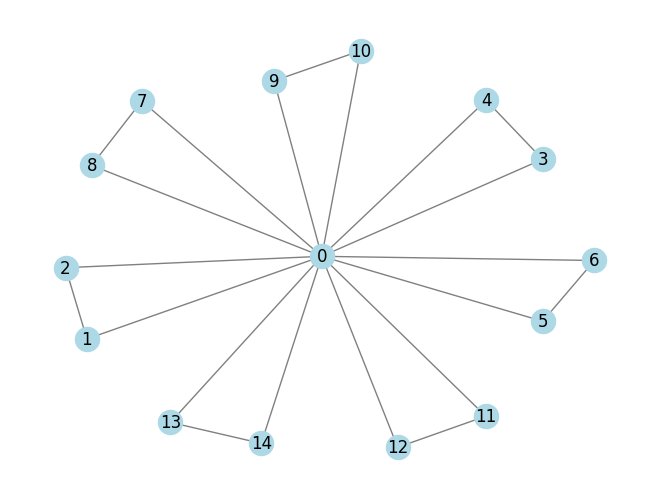

Nodes: 15
Is connected: True


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.windmill_graph(7, 3)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

print(f"Nodes: {G.number_of_nodes()}") # Should be 15
print(f"Is connected: {nx.is_connected(G)}")

**What is a windmill graph?**

A windmill graph, denoted as $Wd(n, k)$, is a specific type of undirected graph constructed by taking $n$ copies of a complete graph $K_k$ (a clique where every node is connected to every other node) and joining them all at a single, shared central vertex.

In simpler terms: it looks like a collection of triangles (or larger shapes) that all "pinch" together at one middle point, like the blades of a windmill.

Mathematically, it requires an odd number of nodes to be constructed. In NetworkX the arguments taken are `(n,k)` where `n` is the number of cliques and `k` is the size of the cliques, therefore, it is impossible accidentally generate a graph with the wrong number of nodes.

**What is a spring layout?**

`nx.spring_layout(G)` is an algorithm that calculates a position (x, y coordinate) for every node to make the graph look visually organized and readable. In NetworkX, nodes don't inherently have "coordinates." If you just tell the library to draw a graph, it has no idea where to place the dots on your screen.

**How to Automatically Generate `n` and `k`?**

In the example above we pre-calculated that if we have 15 nodes then we need to have 7 cliques of 3 sized triangles to satisfy our task. 

`k` equals `3` need to be hardcoded. This is because to satisfy "any set of two people from the club have exactly one friend in common" it must be a triangle. 

For `n`, we know that the structure must have a central person. Given this, we know that the remainder of the triangle must coppucy two more people, therefore, we just need to take the total codes minus the central and divide by two: `(total_members - 1) // 2`

In [31]:
def generate_friendship_tuple(total_members):
    if total_members % 2 == 0:
        raise ValueError("Friendship Theorem must be odd")
    
    num_triangles = (total_members - 1) // 2
    clique_size = 3
    
    return (num_triangles, clique_size)

In [34]:
friendship_tuple = generate_friendship_tuple(15)
print(friendship_tuple)

(7, 3)


In [37]:
def plot_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.show()

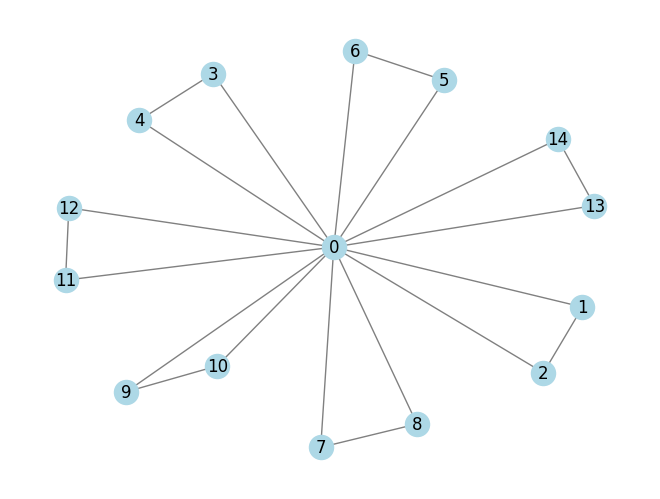

In [39]:
G = nx.windmill_graph(friendship_tuple[0], friendship_tuple[1])
plot_graph(G)

## Question 2

G.nodes()
G.degree('a')

mean degree = k = 2L/N

Where L is number of links, N is the number of nodes

mean degree of 𝑧 ≈ 1.9990123457

What is the number of nodes? 

draw some ‘random’ networks to build an intuition as to what an average degree of less than 2 could mean; you could also consult some of the network databases mentioned in the first lecture and see what typical average degrees look like

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u']


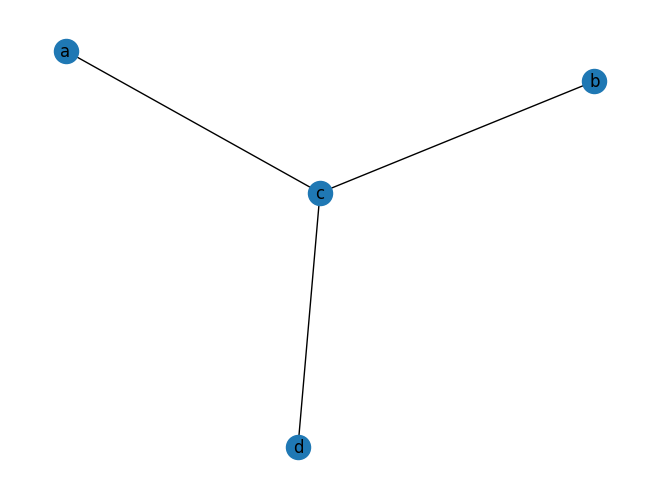

In [ ]:
import random
import string

# generate a random conneced, undirected network

G = nx.Graph()

nodes_to_add = ['a', 'b', 'c', 'd'] # randomize number of nodes
G.add_nodes_from(nodes_to_add)

edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')] # randomized connections within the nodes
G.add_edges_from(edges_to_add)

nx.draw(G, with_labels=True)


nodes = random.randint(0, 26)
alphabet_list = list(string.ascii_lowercase[:26])
print(alphabet_list)
_list = [string.ascii_lowercase[i % 26] for i in range(nodes)]
print(_list)